In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
class LinearRegression(object):
    def __init__(self, learning_rate, iterations):
        data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
        self.price = data[:, 1]
        
        self.kms = data[:, 0]
        self.mean_kms = np.mean(self.kms)
        self.std_kms = np.std(self.kms) 
        self.norm_kms = (self.kms - self.mean_kms)/self.std_kms 
        
        self.theta0 = 0
        self.theta1 = 0
        
        self.learning_rate = learning_rate
        self.iterations = iterations

    def estimatePrice(self, theta0, theta1, mileage):
        return theta0 + theta1 * mileage

    def vec_estimatePrice(self, theta0, theta1):
        return np.vectorize(lambda x : self.estimatePrice(theta0, theta1, x))

    def new_thetas(self, theta0, theta1, kms):
        vfunc = self.vec_estimatePrice(theta0, theta1)
        theta0 = self.learning_rate * np.mean(vfunc(kms) - price)
        theta1 = self.learning_rate * np.mean((vfunc(kms) - price) * kms)
        return theta0, theta1

    def train(self):
        all_theta0 = np.empty((0,1))
        all_theta1 = np.empty((0,1))
        for i in range(self.iterations):
            self.theta0, self.theta1 = self.new_thetas(self.theta0, self.theta1, self.norm_kms)
            all_theta0 = np.append(all_theta0, np.array([[self.theta0]]), axis = 0)
            all_theta1 = np.append(all_theta1, np.array([[self.theta1]]), axis = 0)
        
        all_theta0 = all_theta0 - (self.mean_kms/self.std_kms)
        all_theta1 = all_theta1/self.std_kms
        
        return all_theta0, all_theta1
    
    def plot_loss(self):
        all_theta0, all_theta1 = self.train()
        predictions = all_theta0 + all_theta1 * self.kms
        loss = np.average(np.square(predictions - self.price), axis=1)
        plt.plot(loss)
    
    def predict(self):
        all_theta0, all_theta1 = self.train()
        final_theta0, final_theta1 = all_theta0[-1], all_theta1[-1]
        predict = final_theta0 + final_theta1 * self.kms
        return predict
        

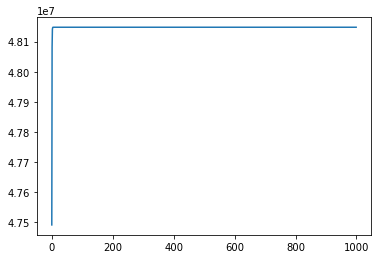

In [109]:
loss = LinearRegression(0.1, 1000).plot_loss()